In [24]:
import numpy as np
import neuraltda.H_MDS as hmds
import matplotlib.pyplot as plt
%matplotlib inline
reload(hmds)

<module 'neuraltda.H_MDS' from 'neuraltda/H_MDS.pyc'>

In [20]:
n = 10
X = np.random.randn(n)
Y = np.random.randn(n)
r = np.random.uniform()
mag = np.multiply(np.random.uniform(1, 4, size=n), np.abs(X+1j*Y))
X = np.divide(X, mag)
Y = np.divide(Y, mag)
D = 100*np.square(np.random.randn(n, n))
D = D - np.diag(np.diag(D))
w = np.ones((n, n))
wtot = 0.5*np.sum(np.sum(D))
w = np.power(D+np.diag(np.ones(n)), -1)/wtot
w = w - np.diag(np.diag(w))


In [21]:
hmds.test_delta_hyperbolic(D)

443.2583061718791

In [18]:
D.shape

(10, 10)

In [ ]:
test = hmds.mobius_xform(1+1j, X[1]+1j*Y[1], 1)

In [ ]:
test = hmds.get_distances(X, Y)

In [ ]:
test = hmds.E_x(X, Y, D, w)

In [ ]:
test = hmds.dE_dxa(D, w, X, Y, 0, 2)

In [ ]:
test

In [ ]:
hmds.ddH_dx1_1(X[1]+1j*Y[1], )

In [ ]:
X

In [ ]:
Y

In [ ]:
new = hmds.HMDS_update(D, w ,X, Y, 1, 0.1)

In [ ]:
new

In [ ]:
eta = 0.1
eps = 1e-4
epsvec = np.ones(n)
diffp = 1
X_s = X
Y_s = Y
lam = 0.001
while diffp > eps:
    E = hmds.E_x(X_s, Y_s, D, w)
    new = hmds.HMDS_update3(D, w, X_s, Y_s,eta, lam)
    for alph in range(len(X)):
        X_s[alph] = np.real(new[alph])
        Y_s[alph] = np.imag(new[alph])
    newE = hmds.E_x(X_s, Y_s, D, w)
    if newE > E:
        lam = lam*10.0
        X_s = X
        Y_s = Y
    elif newE < E:
        lam = lam/10.0
        X = X_s
        Y = Y_s
    if lam > 1e4:
        lam = 1e4
    elif lam < 1e-4:
        lam = 1e-4
    diffp = np.abs(newE-E)
    print(newE)

In [11]:
-

newE: 1.08224411579  E: 1.08745860433
newE: 1.07549623934  E: 1.08224411579
newE: 1.07017727886  E: 1.07549623934
newE: 1.01024489925  E: 1.07017727886
newE: 1.00746693023  E: 1.01024489925
newE: 1.00702984026  E: 1.00746693023
newE: 1.34498424371  E: 1.00702984026
newE: 1.00522963879  E: 1.00702984026
newE: 1.01029320698  E: 1.00522963879
newE: 0.985198165133  E: 1.00522963879
newE: 0.990679891032  E: 0.985198165133
newE: 0.985055570298  E: 0.985198165133
newE: 0.980566948371  E: 0.985055570298
newE: 0.981120881385  E: 0.980566948371
newE: 1.02122839152  E: 0.980566948371
newE: 0.979594183135  E: 0.980566948371
newE: 0.982365386684  E: 0.979594183135
newE: 0.979633697962  E: 0.979594183135


In [ ]:

pts = X+1j*Y
print(pts[0])
print(pts[3])
np.abs(pts[3])

In [8]:
print(hmds.get_distances(X_s, Y_s))
print(D)

[[  0.           5.73002932   1.99324187   0.59023717   4.91019222
    6.28327389   1.37551145   2.14771433   2.6568527    1.4808462 ]
 [  5.73002932   0.           7.1202075    5.45661563   7.84391859
   11.70579476   6.66321509   7.2037747    7.7196958    7.03539212]
 [  1.99324187   7.1202075    0.           2.50973979   6.65068974
    8.19658693   3.34575203   4.13928804   4.64771624   3.32225548]
 [  0.59023717   5.45661563   2.50973979   0.           4.38189736
    6.24924063   1.2126209    1.82043545   2.33573564   1.59947157]
 [  4.91019222   7.84391859   6.65068974   4.38189736   0.          10.49122393
    5.39755683   5.76089503   6.27180071   5.92982385]
 [  6.28327389  11.70579476   8.19658693   6.24924063  10.49122393   0.
    5.11503356   5.7760743    6.10179881   5.021386  ]
 [  1.37551145   6.66321509   3.34575203   1.2126209    5.39755683
    5.11503356   0.           0.98380178   1.44948535   0.9136202 ]
 [  2.14771433   7.2037747    4.13928804   1.82043545   5.76089

In [ ]:
d = hmds.get_distances(X, Y)
diffmat = np.subtract(d, D)
diffmat = np.square(diffmat)

E = 0.5*np.einsum('ij,ij', w, diffmat)
print(diffmat)
print(E)
print(w)

In [ ]:
def func_to_min(X, D, Npts):
    
    x = X[0:Npts]
    y = X[Npts:]
    d = hmds.get_distances(x, y)
    diff = np.subtract(d, D)
    return np.sum(diff, axis=1)

In [ ]:
from scipy.optimize import leastsq

In [ ]:
x0 = np.hstack((X, Y))
x0 = np.transpose(x0)

In [ ]:

res = leastsq(func_to_min, x0, args=(D, n))

In [22]:
pt = 0.01 +1j*0
pt

(0.01+0j)

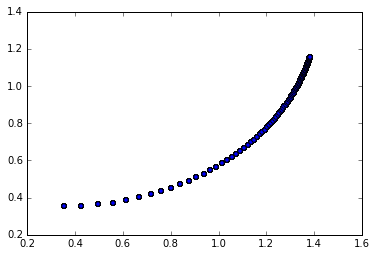

In [27]:
rs = np.linspace(0, 1000, 100)
vec = np.sqrt(2)/4 + 1j*np.sqrt(2)/4
sv = []
for r in rs:
    z = hmds.mobius_xform(pt, vec, rs)
    sv.append(z)
plt.figure()
plt.scatter(np.real(sv), np.imag(sv))